## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from scipy.spatial.distance import minkowski, cdist
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import pairwise_distances

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm = 'brute', metric = "euclidean"):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.data_X = np.asarray(X)
        elif self.algorithm == 'kd_tree':
            self.data_X = KDTree(X, leaf_size=30, metric=self.metric)
        self.data_y = np.asarray(y)
    
    def predict(self, X):
        XX = np.asarray(X)

        if self.algorithm == 'brute':
            ans = np.zeros(XX.shape[0], dtype=self.data_y.dtype)
            for i in range(XX.shape[0]):
                distances = pairwise_distances(self.data_X, XX[i].reshape((1, -1)), metric=self.metric).ravel()
                u, c = np.unique(self.data_y[np.argsort(distances)[:self.n_neighbors]], return_counts=True)
                ans[i] = u[c.argmax()]
            return ans

        elif self.algorithm == 'kd_tree':
            ans = np.zeros(XX.shape[0], dtype=self.data_y.dtype)
            distances = self.data_X.query(XX, self.n_neighbors, return_distance=False)
            for i in range(distances.shape[0]):
                u, c = np.unique(self.data_y[distances[i]], return_counts=True)
                ans[i] = u[c.argmax()]
            return ans
                        
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 997 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 1.99 ms


array([0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1])

In [11]:
%time my_clf.predict(X_test)

Wall time: 4 ms


array([0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1])

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 15 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 997 µs


array([2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1])

In [17]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [26]:
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')

In [32]:
#vectorizer = CountVectorizer(min_df=0.001)
vectorizer = TfidfVectorizer(min_df=0.001, max_df=0.5, max_features=1000)
vector_data = vectorizer.fit_transform(data)

In [33]:
np_data = vector_data.toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
skf = StratifiedKFold(n_splits=3)
data_folds = skf.split(np_data, target)

In [27]:
cross_val_score(my_clf, np_data, target, cv=skf, scoring='accuracy')
# Без ограничения на количество фичей при векторизации, только min_df=0.001, max_df=0.5

array([0.61161188, 0.62079024, 0.61442588])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

[0.23011665 0.23017767 0.22858658]
[0.21527041 0.21055423 0.2094935 ]
[0.20599152 0.21400159 0.21055423]
[0.2102333  0.21877486 0.21134977]
[0.22295864 0.22434368 0.21691859]
[0.23144221 0.22779104 0.2283214 ]
[0.23223754 0.23309467 0.23282949]
[0.23117709 0.23442058 0.23627685]
[0.23303287 0.23097322 0.23574649]
[0.23621421 0.23150358 0.24317157]


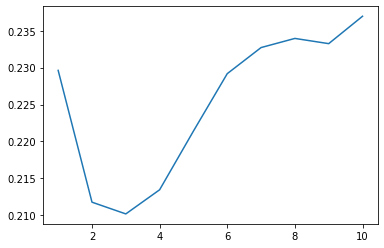

In [31]:
# Количество фичей - 200, так как при больших количествая программа считала очень долго
fig = plt.figure()
x = np.linspace(1, 10, 10)
y = np.zeros(10)
a = np.zeros((10, 3))

for i in range(1, 11):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    a[i - 1] = cross_val_score(my_clf, np_data, target, cv=skf, scoring='accuracy')
    y[i - 1] = a[i - 1].mean()
    print(a[i - 1])

plt.plot(x, y)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [34]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [35]:
test_data = newsgroups['data']
test_target = newsgroups['target']
vector_data = vectorizer.transform(test_data)
test_np_data = vector_data.toarray()

In [37]:
cross_val_score(my_clf, np_data, target, cv=skf, scoring='accuracy')
# min_df=0.001, max_df=0.5, max_features=1000, Tfidf векторизация

array([0.44777306, 0.45399098, 0.45319544])

In [36]:
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')
my_clf.fit(np_data, target)
my_clf_pred = my_clf.predict(test_np_data)
accuracy_score(test_target, my_clf_pred)

0.39922995220392987

Уменьшение результата на тесте относительно кросс валидации может быть связано с тем, что данные между трейном и тестом разделены по времени (всё, что в тесте, опубликовано позже трейна), а при кросс валидации мы не учитывали это.